# Transformación de datos

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
import matplotlib.pyplot as plt

# Modeling
import keras
from keras import Input
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential, Model, load_model
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

letter    W
Name: 0, dtype: object


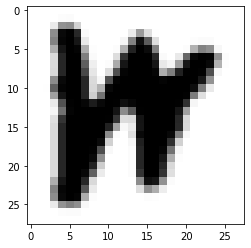

In [32]:
#Carga de información y verificación

df = pd.read_csv('letters.csv')

df.drop('Unnamed: 0',axis=1,inplace=True)
vard = [i for i in df.columns if i != 'letter']

pic = np.array(df.iloc[0,:-1]).reshape(28,28).astype(int)

plt.imshow(pic, cmap=plt.cm.binary)
print(df.iloc[0,-1:])

In [33]:
#Dividir dataframe
X = df.loc[:,df.columns != 'letter']
y = df.loc[:,df.columns == 'letter']

#Normalizar datos
X = tf.keras.utils.normalize(X,axis=1)

In [34]:
#Eliminar variables unarias
eliminadas = []
vard = [i for i in X.columns if i != 'letter']
for v in vard:
    if len(X[v].unique())==1:
        eliminadas.append(v)
        X.drop(v,axis=1,inplace=True)
        
vard = [i for i in X.columns if i != 'letter']

print(f'Numero de variables eliminadas : {len(eliminadas)}')

Numero de variables eliminadas : 36


In [35]:
le = preprocessing.LabelEncoder()
le.fit_transform(y_train)

y=le.transform(y)

y=tf.keras.utils.to_categorical(
    y, num_classes=None, dtype='float32')

C:\Users\joker\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [38]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

x_train = np.array(x_train.values)
x_test = np.array(x_test.values)
# y_train = np.array(y_train.values)
# y_test = np.array(y_test.values)

In [40]:
x_train[0].shape

(748,)

## Red Neuronal

In [41]:
#Creacion de red neuronalforward feed.
model = Sequential()

#Input layer
model.add(Input(shape=(x_train.shape[1],)))

#Hidden layers
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))

#Output layer
model.add(Dense(26, activation="softmax"))

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               95872     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 26)                3354      
Total params: 115,738
Trainable params: 115,738
Non-trainable params: 0
_________________________________________________________________


## Configuración del modelo

In [43]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Entrenamiento del modelo

In [45]:
model.fit(x = x_train, y=y_train, 
          epochs = 10, 
          batch_size = 10, 
          validation_data=(x_test, y_test))

Epoch 1/10
9360/9360 [==============================] - 18s 2ms/step - loss: 0.2255 - accuracy: 0.9229 - val_loss: 0.3188 - val_accuracy: 0.9014
Epoch 2/10
9360/9360 [==============================] - 18s 2ms/step - loss: 0.2086 - accuracy: 0.9278 - val_loss: 0.3398 - val_accuracy: 0.8975
Epoch 3/10
9360/9360 [==============================] - 17s 2ms/step - loss: 0.1952 - accuracy: 0.9316 - val_loss: 0.3425 - val_accuracy: 0.8991
Epoch 4/10
9360/9360 [==============================] - 17s 2ms/step - loss: 0.1853 - accuracy: 0.9348 - val_loss: 0.3227 - val_accuracy: 0.9057
Epoch 5/10
9360/9360 [==============================] - 18s 2ms/step - loss: 0.1722 - accuracy: 0.9383 - val_loss: 0.3418 - val_accuracy: 0.9019
Epoch 6/10
9360/9360 [==============================] - 18s 2ms/step - loss: 0.1657 - accuracy: 0.9396 - val_loss: 0.3473 - val_accuracy: 0.9010
Epoch 7/10
9360/9360 [==============================] - 17s 2ms/step - loss: 0.1559 - accuracy: 0.9433 - val_loss: 0.3622 - val_ac

### Se logró un accuracy en el conjunto de validacion de .9060 demostrando que la red realmente logró generalizar lo visto en el conjunto de entrenamiento